Facial Recognition is used today for many different applications, including cell phone security, recovering missing persons, diaognosing medical issues, and much more. Thus, research in facial recognition algorithms and machine learning applications is always evolving. One of the basic and widely known methods for facial recognition makes use of "eigenfaces", a term that was first coined by MIT scientists M. Turk and A. Pentland in a paper proving that eigenvectors could be used as a tool for facial recognition. I find this topic extremely interesing because I love exploring the intersection of math and computer science.

One can translate this problem into the lanugage of linear algebra by thinking of each image as a matrix of pixels represented by integeter values. These matrices can be combined into one matrix where one row represents an image of a face. They can then be compressed and mean centered. From there principle component analysis can be performed, calculating each image's eigen values and eigen vectors. This way only the more important variances are analyzed, this saves time and computing power because calculations are now happening on a lower dimension so there is less data to consider. Once these calculations have been performed a random image can be selected and projected into the eigen space previously calculated. The euclidean distance between the randomly selected test vector and the data set vectors can then be calculated. The vector from the data set that produces the smallest euclidean distance will represent the image that is most similar to the randomly selected image and therefore represent the face of the randomly selected individual. 

This application is educational because it shows how something that is typically thought of as 2d, such as an image, and not nessarily quantative, can be represented numerically and make use of linear algebra principles. It also shows how completing calculations to reduce/compress data can shave a lot off of a program's running time.

This program uses pre-cropped images from the Extended Yale B Face Database https://paperswithcode.com/dataset/extended-yale-b-1 which is a database of images of 38 individuals with diferent angles and lighting. They are all the same size. For this use case, one image from each individual was chosen with a head on angle and the same lighting. Future iterations of this project could include different angles and lighting.

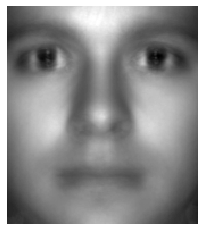

In [11]:
#import packages
import random
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

#set default directory
#REPLACE this with the path name for the folder that holds this project on your computer 
os.chdir(r"C:\Users\kucke\OneDrive\Desktop\Linear\EigenVector_Facial_Recognition") 

path = "CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm"

# converts the image to a grayscale
img = Image.open(path).convert('L')

imagMat = np.array(img)

#.shape returns a tuple containing the dimensions of imagMat
originalShape = imagMat.shape

#ravel returns a single array with the rows of the input matrix(imgMat) concantanated into one array
flat = imagMat.ravel()

faceVector = np.matrix(flat)
length = faceVector.shape[1]

#array to hold the path names for all the images from the Extended Yale B Face Database https://paperswithcode.com/dataset/extended-yale-b-1
images = []

#creates matrix of zeros, with dimensions 38 x length that will be used to hold the face vectors
faceMat = np.zeros(shape=(38, length))

#iterates through dataset to get one head on photo from each subject
#then converts each image into a vector and adds it as a row in facemat, skips 14 because there is no 14th subject
for i in [x for x in range(1, 40) if x != 14]:
    if i < 10:
        path = "CroppedYale/yaleB0" + str(i) + "/yaleB0" + str(i) + "_P00A+000E+00.pgm"
    else:
        path = "CroppedYale/yaleB" + str(i) + "/yaleB" + str(i) + "_P00A+000E+00.pgm"
    
    #adds image with pathname path to images array
    images.append(path)

    # converts the image to a grayscale
    img = Image.open(path).convert('L')

    #takes pixels in image and puts them in an array
    imageArray = np.array(img)

    #ravel returns a single array with the rows of the input array(imgarray) concantanated into one array
    flat = imageArray.ravel()

    #creates a single row matrix, faceVector, that can be as a row to faceMat
    faceVector = np.matrix(flat)

    #adds faceVector as bottom row of facemat
    if(i<14):
        faceMat[i-1] = faceVector[0:length-1]
    else:
        faceMat[i-2] = faceVector[0:length-1]

#calculates the mean of each row, representing the mean of each face
avrgFace = np.int16(np.mean(faceMat, axis = 0))

#reshapes the data to image dimensions so that it can be plotted
avrgFaceArray = np.asarray(avrgFace.reshape(originalShape))

#plots the mean face of all 38 faces
plt.imshow(avrgFaceArray, cmap = plt.get_cmap("gray"))
plt.axis("off")
plt.show()

In [12]:
#Mean centers the data to allow for principal component analysis
A = (faceMat-avrgFace)

#Finds the transpose of mean centered data, now each coloumn represents a face
AT = np.transpose(A)

#Calculates the covariance matrix to find our distribution, meaning to find the axes where the data shows the most variance
covMat = np.cov(A)

#Finds the eigenvalues and eigenvectors of the covariance matrix, giving us the principal components of our dataset, meaning that these eigenvectors 
# span the image subspace and therefore find the most prominent facial features; the eigenvalues represent the weight a vector carries, 
# meaning how representative that vector is of a face.
eigenVals, eigenVects = np.linalg.eigh(covMat)
eigenVals=eigenVals.real
eigenVects=eigenVects.real

#sorts the eigenvalues and eigenvectors in decreasing order, 
idx = eigenVals.argsort()[::-1]   
eigenVals = eigenVals[idx]
eigenVects = eigenVects[:,idx]
print("The highest eigenvalue is ", (eigenVals[0]), "\n")
print("The corresponding eigenvector is\n",eigenVects)

The highest eigenvalue is  3402.8068717395913 

The corresponding eigenvector is
 [[-0.09300748  0.04903344 -0.01580493 ... -0.17153142  0.13534605
  -0.16200611]
 [ 0.4028232  -0.02680389 -0.13929474 ...  0.19749174  0.08687882
  -0.16251669]
 [-0.03566035 -0.00641684  0.12728986 ...  0.18467537  0.04632824
  -0.16133155]
 ...
 [ 0.00939129  0.05130332  0.09117448 ...  0.23984099  0.02870415
  -0.16233013]
 [-0.00863774 -0.01872207  0.08529514 ... -0.32372264 -0.12689075
  -0.16272441]
 [-0.15099429  0.02752671 -0.29744346 ...  0.11589632  0.05818672
  -0.16262796]]


1


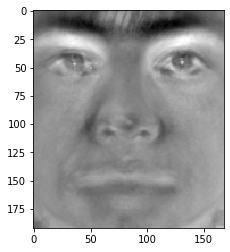

2


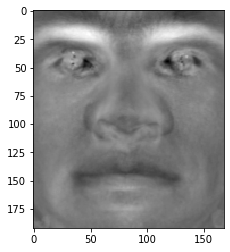

3


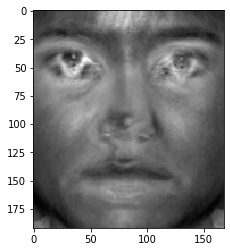

4


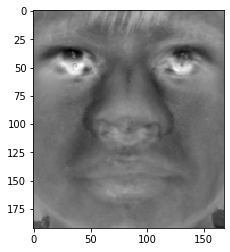

5


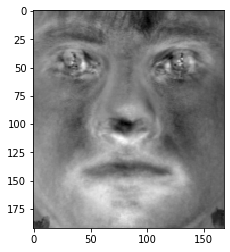

In [13]:
#Calculates a matrix containing the projected eigenvectors
eigenFaceMat = np.matmul(AT, eigenVects)

#Project the the top 5 eigenvectors(meaning they have the top 5 eigenvalues) back into our original space so that the eigen faces can be plotted as images
for i in range(5):
    figure = plt.figure()
    print(i+1)
    plt.imshow(eigenFaceMat[:,i].reshape(originalShape), cmap = plt.get_cmap("gray"))
    plt.show()
    figure.savefig('results/'+str(i+1) +"_eigenface.jpg")

The test image path is  CroppedYale/yaleB36/yaleB36_P00A+000E+00.pgm


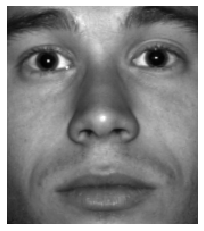

In [14]:
#Choose a random test image from the dataset and plot it
imgIdx = random.randint(0, 38)
imgPath = images[imgIdx]
print("The test image path is ", imgPath)
img=Image.open(imgPath).convert('L')
imageArray = np.array(img)
plt.imshow(img, cmap = plt.get_cmap("gray"))
plt.axis("off")
plt.show()

The closest file is CroppedYale/yaleB36/yaleB36_P00A+000E+00.pgm


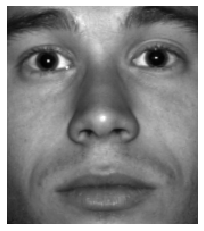

In [15]:
#mean center the test face and project the test vector to the eigen space
flat = imageArray.ravel()
testVect = np.matrix(flat) - avrgFace.ravel()
testVectT = np.transpose(testVect)
eigenFaceMatT =  np.transpose(eigenFaceMat)
testProj = np.matmul(eigenFaceMatT, testVectT)

projections = np.matmul(eigenFaceMatT, AT)

#Calculate the euclidean distance between the test face vector and the other faces in the dataset
#The face in the dataset with the smallest distance will be the most similar face 
eucDist = np.square(projections - testProj).sum(axis = 0)
closestIdx = int(eucDist.argsort()[::-1][:,0])
closestPath = images[closestIdx]

print("The closest file is",closestPath)

#Plot the closest face selected from the dataset
img=Image.open(closestPath).convert('L')
plt.imshow(img, cmap = plt.get_cmap("gray"))
plt.axis("off")
plt.show()

Sources
-https://paperswithcode.com/dataset/extended-yale-b-1
-http://www.scholarpedia.org/article/Eigenfaces
-https://medium.com/swlh/eigenvectors-and-eigenvalues-face-recognition-eigen-faces-f82ebb0b1973
-https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184
-https://www.geeksforgeeks.org/ml-face-recognition-using-eigenfaces-pca-algorithm/
-https://www.sciencedirect.com/science/article/pii/S2212017312000242
-https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading7b.pdf